# Alternating Direction Implicit Method Applied to the 3D Wave Equation
Both the simple explicit and simple implicit methods used in `simple_explicit_implicit_methods.ipynb` can be applied to higher-dimensional problems. However, they become very computationally expensive<sub>[1]</sub>. This motivates the alternating direction implicit method (ADI), which combines the simple explicit and simple implicit methods to produce finite difference discretizations corresponding to efficiently-solvable tridiagonal matrix equations.

It will be shown in this notebook that ADI can be applied to solving the hyperbolic wave equation:

$$ \frac{\partial^{2} u}{\partial t^{2}} = c^{2} \nabla^{2} u $$

Where $\nabla^{2}$ is the spatial Laplace operator. In three dimensions, and letting $c^{2} = 1$, the PDE becomes the following:

$$ \frac{\partial^{2} u}{\partial t^{2}} = \frac{\partial^{2} u}{\partial x^{2}} + \frac{\partial^{2} u}{\partial y^{2}} + \frac{\partial^{2} u}{\partial z^{2}} $$

There is now a choice to be made regarding finite difference discretizations of the spatial partial derivatives. Either the implicit or explicit methods could be employed to approximate a second derivative in an arbitrary spatial dimension. Superscripts denote a time step and subscripts denote a spatial node for the remainder of this document. The explicit central difference discretization is taken at the current time step, $l$, so that the values of $u$ are known thanks to an initial condition:

$$ \frac{\partial^{2} u}{\partial x^{2}} \approx \frac{u^{l}_{i - 1, \, j, \, k} - 2u^{l}_{i, \, j, \, k} + u^{l}_{i + 1, \, j, \, k}}{(\Delta x)^{2}} $$

And the implicit central difference discretization is taken at the next time step, $l + 1$. Values of $u$ are unknown in this discretization:

$$ \frac{\partial^{2} u}{\partial x^{2}} \approx \frac{u^{l + 1}_{i - 1, \, j, \, k} - 2u^{l + 1}_{i, \, j, \, k} + u^{l + 1}_{i + 1, \, j, \, k}}{(\Delta x)^{2}} $$

Rather than solving for the future values of $u$ in all dimensions at once, the implicit discretization can be applied to one dimension at a time and the resulting tridiagonal matrix equation solved for values at a partial time step in the future<sub>[2]</sub>. Since there are three dimensions that need solving, this partial time step is chosen to be $1/3$ so that a whole step has elapsed after the third dimension is solved.

$$ \frac{u^{l - 1/3}_{i, \, j, \, k} - 2u^{l}_{i, \, j, \, k} + u^{l + 1/3}_{i, \, j, \, k}}{(\Delta t)^{2}} = \overbrace{\frac{u^{l + 1/3}_{i - 1, \, j, \, k} - 2u^{l + 1/3}_{i, \, j, \, k} + u^{l + 1/3}_{i + 1, \, j, \, k}}{(\Delta x)^{2}}}^{\text{Implicit in the x dimension}} + \underbrace{\frac{u^{l}_{i, \, j - 1, \, k} - 2u^{l}_{i, \, j, \, k} + u^{l}_{i, \, j + 1, \, k}}{(\Delta y)^{2}} + \frac{u^{l}_{i, \, j, \, k - 1} - 2u^{l}_{i, \, j, \, k} + u^{l}_{i, \, j, \, k + 1}}{(\Delta z)^{2}}}_{\text{Explicit in other dimensions}} $$

The expression can be simplified with the establishment of a uniform grid where $\Delta d = \Delta x = \Delta y = \Delta z$.

$$ \frac{u^{l - 1/3}_{i, \, j, \, k} - 2u^{l}_{i, \, j, \, k} + u^{l + 1/3}_{i, \, j, \, k}}{(\Delta t)^{2}} = \frac{1}{( \Delta d )^{2}} \left ( u^{l + 1/3}_{i - 1, \, j, \, k} - 2u^{l + 1/3}_{i, \, j, \, k} + u^{l + 1/3}_{i + 1, \, j, \, k} + u^{l}_{i, \, j - 1, \, k} - 2u^{l}_{i, \, j, \, k} + u^{l}_{i, \, j + 1, \, k} + u^{l}_{i, \, j, \, k - 1} - 2u^{l}_{i, \, j, \, k} + u^{l}_{i, \, j, \, k + 1} \right ) $$

Defining $\lambda \equiv ( \Delta d / \Delta t )^{2}$, combining terms, and isolating the unknown future values on the left side yields the following:

$$ -u^{l + 1/3}_{i - 1, \, j, \, k} + ( \lambda + 2 ) u^{l + 1/3}_{i, \, j, \, k} - u^{l + 1/3}_{i + 1, \, j, \, k} = 2 ( \lambda - 2 ) u^{l}_{i, \, j, \, k} - \lambda u^{l - 1/3}_{i, \, j, \, k} + u^{l}_{i, \, j - 1, \, k} + u^{l}_{i, \, j + 1, \, k} + u^{l}_{i, \, j, \, k - 1} + u^{l}_{i, \, j, \, k + 1} $$

Which, for a domain of $0$ to $n$ nodes in the $x$ dimension, corresponds to the tridiagonal matrix equation below. Notice that there are equations written only for nodes $1$ to $n - 1$ because the discretization can only be applied to interior nodes. $u^{l + 1/3}_{0, \, j, \, k}$ and $u^{l + 1/3}_{n, \, j, \, k}$ in the right hand side vector are the future values of the exterior nodes, and should be set according to the problem's boundary conditions.

$$ 
\begin{pmatrix} 
( \lambda + 2 ) & -1 & & & 0 \\
-1 & ( \lambda + 2 ) & -1 & & \\
& \ddots & \ddots & \ddots & \\
& & -1 & ( \lambda + 2 ) & -1 \\
0 & & & -1 & ( \lambda + 2 )
\end{pmatrix} 
\begin{pmatrix} u^{l + 1/3}_{1, \, j, \, k} \\
u^{l + 1/3}_{2, \, j, \, k} \\
\vdots \\
u^{l + 1/3}_{n - 2, \, j, \, k} \\
u^{l + 1/3}_{n - 1, \, j, \, k}
\end{pmatrix}
=
\begin{pmatrix}
u^{l + 1/3}_{0, \, j, \, k} + 2 ( \lambda - 2 ) u^{l}_{1, \, j, \, k} - \lambda u^{l - 1/3}_{1, \, j, \, k} + u^{l}_{1, \, j - 1, \, k} + u^{l}_{1, \, j + 1, \, k} + u^{l}_{1, \, j, \, k - 1} + u^{l}_{1, \, j, \, k + 1} \\
2 ( \lambda - 2 ) u^{l}_{2, \, j, \, k} - \lambda u^{l - 1/3}_{2, \, j, \, k} + u^{l}_{2, \, j - 1, \, k} + u^{l}_{2, \, j + 1, \, k} + u^{l}_{2, \, j, \, k - 1} + u^{l}_{2, \, j, \, k + 1} \\
\vdots \\
2 ( \lambda - 2 ) u^{l}_{n - 2, \, j, \, k} - \lambda u^{l - 1/3}_{n - 2, \, j, \, k} + u^{l}_{n - 2, \, j - 1, \, k} + u^{l}_{n - 2, \, j + 1, \, k} + u^{l}_{n - 2, \, j, \, k - 1} + u^{l}_{n - 2, \, j, \, k + 1} \\
u^{l + 1/3}_{n, \, j, \, k} + 2 ( \lambda - 2 ) u^{l}_{n - 1, \, j, \, k} - \lambda u^{l - 1/3}_{n - 1, \, j, \, k} + u^{l}_{n - 1, \, j - 1, \, k} + u^{l}_{n - 1, \, j + 1, \, k} + u^{l}_{n - 1, \, j, \, k - 1} + u^{l}_{n - 1, \, j, \, k + 1}
\end{pmatrix} \tag{1}
$$

A problem with this matrix equation is that it requires that $u^{l - 1/3}_{i, \, j, \, k}$ is known, which is not possible during the first time step. A special matrix equation not requiring knowledge of pre-initial conditions can be formulated by revisiting the temporal finite difference discretization--specifically by replacing the central difference with a forward difference discretization. Consider a forward Taylor series expansion:

$$ f(t + \Delta t) = f(t) + \Delta t f'(t) + \frac{(\Delta t)^{2}}{2!} f''(t) + \mathcal{O} \left [ (\Delta t)^{3} \right ] $$

Truncating the higher-order terms and solving for $f''(t)$ yields a forward finite difference approximation of the second derivative which is used to form an alternate discretization of the wave equation:

$$ f''(t) \approx \frac{2 \left [ f(t + \Delta t) - f(t) - (\Delta t) f'(t) \right ]}{(\Delta t)^{2}} $$

$$ \frac{2 \left [ u^{l + 1/3}_{i, \, j, \, k} - u^{l}_{i, \, j, \, k} - (\Delta t) \dfrac{\partial}{\partial t} u^{l}_{i, \, j, \, k} \right ]}{(\Delta t)^{2}} = \frac{u^{l + 1/3}_{i - 1, \, j, \, k} - 2u^{l + 1/3}_{i, \, j, \, k} + u^{l + 1/3}_{i + 1, \, j, \, k}}{(\Delta x)^{2}} + \frac{u^{l}_{i, \, j - 1, \, k} - 2u^{l}_{i, \, j, \, k} + u^{l}_{i, \, j + 1, \, k}}{(\Delta y)^{2}} + \frac{u^{l}_{i, \, j, \, k - 1} - 2u^{l}_{i, \, j, \, k} + u^{l}_{i, \, j, \, k + 1}}{(\Delta z)^{2}} $$

Maintaining the earlier definitions of $\Delta d$ and $\lambda$, combining terms, and isolating unknown values on the left side yields the following expression and its corresponding matrix equation:

$$ -u^{l + 1/3}_{i - 1, \, j, \, k} + 2 (\lambda + 1) u^{l + 1/3}_{i, \, j, \, k} - u^{l + 1/3}_{i + 1, \, j, \, k} = 2 (\lambda - 2) u^{l}_{i, \, j, \, k} + 2 \lambda (\Delta t) \frac{\partial}{\partial t} u^{l}_{i, \, j, \, k} + u^{l}_{i, \, j - 1, \, k} + u^{l}_{i, \, j + 1, \, k} + u^{l}_{i, \, j, \, k - 1} + u^{l}_{i, \, j, \, k + 1} $$

$$ 
\begin{pmatrix} 
2 ( \lambda + 1 ) & -1 & & & 0 \\
-1 & 2 ( \lambda + 1 ) & -1 & & \\
& \ddots & \ddots & \ddots & \\
& & -1 & 2 ( \lambda + 1 ) & -1 \\
0 & & & -1 & 2 ( \lambda + 1 )
\end{pmatrix} 
\begin{pmatrix} u^{l + 1/3}_{1, \, j, \, k} \\
u^{l + 1/3}_{2, \, j, \, k} \\
\vdots \\
u^{l + 1/3}_{n - 2, \, j, \, k} \\
u^{l + 1/3}_{n - 1, \, j, \, k}
\end{pmatrix}
=
\begin{pmatrix}
u^{l + 1/3}_{0, \, j, \, k} + 2 ( \lambda - 2 ) u^{l}_{1, \, j, \, k} + 2 \lambda (\Delta t) \dfrac{\partial}{\partial t} u^{l}_{1, j, k} + u^{l}_{1, \, j - 1, \, k} + u^{l}_{1, \, j + 1, \, k} + u^{l}_{1, \, j, \, k - 1} + u^{l}_{1, \, j, \, k + 1} \\
2 ( \lambda - 2 ) u^{l}_{2, \, j, \, k} + 2 \lambda (\Delta t) \dfrac{\partial}{\partial t} u^{l}_{2, j, k} + u^{l}_{2, \, j - 1, \, k} + u^{l}_{2, \, j + 1, \, k} + u^{l}_{2, \, j, \, k - 1} + u^{l}_{2, \, j, \, k + 1} \\
\vdots \\
2 ( \lambda - 2 ) u^{l}_{n - 2, \, j, \, k} + 2 \lambda (\Delta t) \dfrac{\partial}{\partial t} u^{l}_{n - 2, j, k} + u^{l}_{n - 2, \, j - 1, \, k} + u^{l}_{n - 2, \, j + 1, \, k} + u^{l}_{n - 2, \, j, \, k - 1} + u^{l}_{n - 2, \, j, \, k + 1} \\
u^{l + 1/3}_{n, \, j, \, k} + 2 ( \lambda - 2 ) u^{l}_{n - 1, \, j, \, k} + 2 \lambda (\Delta t) \dfrac{\partial}{\partial t} u^{l}_{n - 1, j, k} + u^{l}_{n - 1, \, j - 1, \, k} + u^{l}_{n - 1, \, j + 1, \, k} + u^{l}_{n - 1, \, j, \, k - 1} + u^{l}_{n - 1, \, j, \, k + 1}
\end{pmatrix} \tag{2}
$$

Equation $(2)$ must be solved during the first time step, and equation $(1)$ must be solved for all others. It is reasonable that equation $(2)$ requires that $\partial u/\partial t$ is initially known because the wave equation is second order in time. Physical intuition for this requirement can come from the case of a vibrating string: the position and velocity of a point must be known to predict its future.

Multiple matrix equations need to be solved for a single spatial dimension since location on the $y$ and $z$ axes is required to select specific values of $u$. If the domain is a cube, as it is in this problem, then matrix equations such as that above must be solved $( n - 1 )^{2}$ times for each dimension. When all $3 ( n - 1 )^{2}$ tridiagonal systems have been solved, the simulation is at time step $l + 1$, and the process can be repeated for the remaining times. This procedure is implemented in the following cells.

In [9]:
import numpy as np
from tqdm import trange
from scipy.linalg import lu
from thomas_solve import thomas_solve

# Parameters:
length = 10 # Length of one side of the cube domain.
time = 10 # Total simulation time.
Dd = 0.1 # Node (grid) spacing.
Dt = 1/3 # Time spacing.
lam = (Dd/Dt)**2
num_nodes = int(length/Dd) # Number of nodes in one dimension.
num_eqn = num_nodes - 2 # Also the number of interior nodes in one dimension.
num_partial_time_steps = int(time/Dt)
num_time_steps = num_partial_time_steps/3

# Preallocate 4D solution space array u[x, y, z, t] with Dirichlet boundary conditions. Then apply the iniial condition:
u = np.zeros((num_nodes, num_nodes, num_nodes, num_nodes))
u[49, 49, 49, 0] = 1

# The other initial condition is the initial rate of change, du/dt:
dudt = np.zeros((num_nodes, num_nodes, num_nodes))

# Preallocate matrix equation arrays:
A = np.zeros((num_eqn, num_eqn))
x = np.zeros(num_eqn)
b = np.zeros(num_eqn)

# LU decompose the coefficient matrix in equation (2):
main_diag = [2*(lam + 1)]*num_eqn
off_diag = [-1]*(num_eqn - 1)
A = A + np.diag(main_diag) + np.diag(off_diag, k=1) + np.diag(off_diag, k=-1)
P, L, U = lu(A)
assert P.all() == np.eye(num_eqn).all() # If the permutation matrix is not the identity matrix, there is a problem.
l1 = np.diag(L, k=-1)
u0 = np.diag(U)
u1 = np.diag(U, k=1)

# Solve equation (2) for the first time step:
# x dimension:
for j in range(1, num_eqn):
    for k in range(1, num_eqn):

        # Assemble b and solve:
        b[:] = 2*(lam - 2)*u[1:-1, j, k, 0] + 2*lam*Dt*dudt[1:-1, j, k] + u[1:-1, j - 1, k, 0] + u[1:-1, j + 1, k, 0] \
                + u[1:-1, j, k - 1, 0] + u[1:-1, j, k + 1, 0]
        b[0] += u[0, j, k, 0]
        b[-1] += u[-1, j, k, 0]
        u[1:-1, j, k, 1] = thomas_solve(l1, u0, u1, b)

# y dimension:
for i in range(1, num_eqn):
    for k in range(1, num_eqn):

        # Assemble b and solve:
        b[:] = 2*(lam - 2)*u[i, 1:-1, k, 0] + 2*lam*Dt*dudt[i, 1:-1, k] + u[i - 1, 1:-1, k, 0] + u[i + 1, 1:-1, k, 0] \
                + u[i, 1:-1, k - 1, 0] + u[i, 1:-1, k + 1, 0]
        b[0] += u[i, 0, k, 0]
        b[-1] += u[i, -1, k, 0]
        u[i, 1:-1, k, 2] = thomas_solve(l1, u0, u1, b)

# z dimension:
for i in range(1, num_eqn):
    for j in range(1, num_eqn):

        # Assemble b and solve:
        b[:] = 2*(lam - 2)*u[i, j, 1:-1, 0] + 2*lam*Dt*dudt[i, j, 1:-1] + u[i, j - 1, 1:-1, 0] + u[i, j + 1, 1:-1, 0] \
                + u[i - 1, j, 1:-1, 0] + u[i + 1, j, 1:-1, 0]
        b[0] += u[i, j, 0, 0]
        b[-1] += u[i, j, -1, 0]
        u[i, j, 1:-1, 3] = thomas_solve(l1, u0, u1, b)

# LU decompose the coefficient matrix in equation (1):
main_diag = [lam + 2]*num_eqn
off_diag = [-1]*(num_eqn - 1)
A = np.zeros((num_eqn, num_eqn))
A = A + np.diag(main_diag) + np.diag(off_diag, k=1) + np.diag(off_diag, k=-1)
P, L, U = lu(A)
assert P.all() == np.eye(num_eqn).all() # If the permutation matrix is not the identity matrix, there is a problem.
l1 = np.diag(L, k=-1)
u0 = np.diag(U)
u1 = np.diag(U, k=1)

# Solve equation (1) for the remaining time steps:
for partial_l in trange(1, num_partial_time_steps - 3):

    # It is important to realize that when l has increased by 3, the simulation time step has increased by 1. So assigning 
    # to u[i, j, k, l] requires translating l back to simulation time:
    l = int(np.floor(partial_l/3))

    # x dimension:
    for j in range(1, num_eqn):
        for k in range(1, num_eqn):

            # Assemble b and solve:
            b[:] = 2*(lam - 2)*u[1:-1, j, k, l] - lam*u[1:-1, j, k, l - 1] + u[1:-1, j - 1, k, l] + u[1:-1, j + 1, k, l] \
                    + u[1:-1, j, k - 1, l] + u[1:-1, j, k + 1, l]
            b[0] += u[0, j, k, 0]
            b[-1] += u[-1, j, k, 0]
            u[1:-1, j, k, l + 1] = thomas_solve(l1, u0, u1, b)

    # y dimension:
    for i in range(1, num_eqn):
        for k in range(1, num_eqn):

            # Assemble b and solve:
            b[:] = 2*(lam - 2)*u[i, 1:-1, k, l] - lam*u[i, 1:-1, k, l - 1] + u[i - 1, 1:-1, k, l] + u[i + 1, 1:-1, k, l] \
                    + u[i, 1:-1, k - 1, l] + u[i, 1:-1, k + 1, l]
            b[0] += u[i, 0, k, 0]
            b[-1] += u[i, -1, k, 0]
            u[i, 1:-1, k, l + 1] = thomas_solve(l1, u0, u1, b)

    # z dimension:
    for i in range(1, num_eqn):
        for j in range(1, num_eqn):
            
            # Assemble b and solve:
            b[:] = 2*(lam - 2)*u[i, j, 1:-1, l] - lam*u[i, j, 1:-1, l - 1] + u[i, j - 1, 1:-1, l] + u[i, j + 1, 1:-1, l] \
                    + u[i - 1, j, 1:-1, l] + u[i + 1, j, 1:-1, l]
            b[0] += u[i, j, 0, 0]
            b[-1] += u[i, j, -1, 0]
            u[1:-1, j, k, l + 1] = thomas_solve(l1, u0, u1, b)

100%|██████████████████████████████████████████████████████████████████████████████████| 26/26 [02:07<00:00,  4.92s/it]


<IPython.core.display.Javascript object>


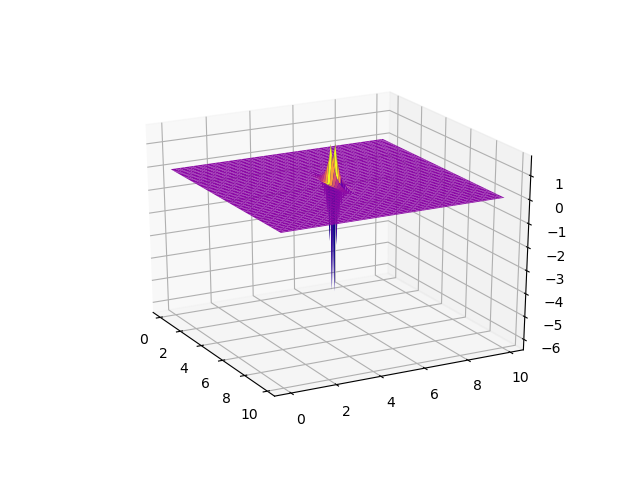

In [36]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import cm

fig = plt.figure()
ax = fig.gca(projection='3d')

x = y= np.arange(0, length, Dd)
t = np.arange(0, time, Dt)
x, y = np.meshgrid(x, y)
u_xy = u[:, :, 49, 1]

surf = ax.plot_surface(x, y, u_xy, cmap=cm.plasma)

## References
[1] Chapra, S. C., &amp; Canale, R. P. (2015). Numerical Methods for Engineers (7th ed.). New York, NY: McGraw-Hill Education.

[2] Peaceman, D., & Rachford, H. (1955). The Numerical Solution of Parabolic and Elliptic Differential Equations. Journal of the Society for Industrial and Applied Mathematics, 3(1), 28-41. Retrieved August 4, 2020, from www.jstor.org/stable/2098834